We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

## Import Libraries

In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from numpy import asarray
from sklearn.preprocessing import StandardScaler
#! pip install imblearn

## Load and review data

In [2]:
cData = pd.read_csv(r"C:\Users\Navnit Ashok Nair\OneDrive\Desktop\SINDy\TBC_data_study_1.csv")  
cData.shape

(153, 15)

In [3]:
cData=cData.drop(['Unnamed: 0','std_rho','std_R','RelativeDessityError','RelativeTBCError','dT'],axis=1)
cData.head()

,NSheets,WidthWater,LengthGraphene,Temperature,Pressure,ContactAngle,SurfaceTension,RelativeDensity,RelativeTBR
0,8,30,60,280,1,120,75.741886,1.487170,1.585502
1,8,30,60,300,1,130,72.935536,1.548031,1.610285
2,8,30,60,280,1,130,75.741886,1.569903,1.818463
3,8,30,60,360,1,130,63.308599,1.598603,1.569393
4,8,30,60,340,1,120,66.709466,1.599308,1.339219


In [5]:
x=cData.drop(['Temperature'],axis=1)
Y=cData['Temperature']
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x1, Y1 = sm.fit_resample(x, Y.ravel())
x1['Temperature']=Y1

In [6]:
x1.groupby('Temperature').count()

,NSheets,WidthWater,LengthGraphene,Pressure,ContactAngle,SurfaceTension,RelativeDensity,RelativeTBR
Temperature,,,,,,,,
260,105,105,105,105,105,105,105,105
280,105,105,105,105,105,105,105,105
300,105,105,105,105,105,105,105,105
340,105,105,105,105,105,105,105,105
360,105,105,105,105,105,105,105,105


In [7]:
n=x1['Temperature'].unique().tolist()
#n=n.sort()
n.sort()
n

[260, 280, 300, 340, 360]

TRAINING : DEGREE TWO _ 260 _ 0.92178160101824
TEST : DEGREE TWO _  260 _ 0.8134879501040395


C:\Users\Navnit Ashok Nair\AppData\Local\Temp\ipykernel_14660\83554143.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame = df_frame.append(lreg_coefficient)
C:\Users\Navnit Ashok Nair\AppData\Local\Temp\ipykernel_14660\83554143.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame = df_frame.append(lreg_coefficient)


TRAINING : DEGREE TWO _ 280 _ 0.9433366298495137
TEST : DEGREE TWO _  280 _ 0.8361064527343091
TRAINING : DEGREE TWO _ 300 _ 0.935741795472934
TEST : DEGREE TWO _  300 _ 0.49092389112225787


C:\Users\Navnit Ashok Nair\AppData\Local\Temp\ipykernel_14660\83554143.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame = df_frame.append(lreg_coefficient)
C:\Users\Navnit Ashok Nair\AppData\Local\Temp\ipykernel_14660\83554143.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame = df_frame.append(lreg_coefficient)
C:\Users\Navnit Ashok Nair\AppData\Local\Temp\ipykernel_14660\83554143.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame = df_frame.append(lreg_coefficient)


TRAINING : DEGREE TWO _ 340 _ 0.9729314063621634
TEST : DEGREE TWO _  340 _ 0.9600141235406736
TRAINING : DEGREE TWO _ 360 _ 0.9756963018779465
TEST : DEGREE TWO _  360 _ 0.9647725898387196
               1  NSheets  WidthWater  LengthGraphene  Pressure  ContactAngle  \
Temperature                                                                     
260          0.0  0.00000     0.00000        0.000000 -0.032440      0.112145   
280          0.0  0.00000     0.00000        0.000000 -0.043923      0.296141   
300          0.0 -0.34395     0.00094       -0.032654 -0.026268      0.197575   
340          0.0  0.00000     0.00000        0.000000 -0.035098      0.250237   
360          0.0  0.00000     0.00000        0.000000 -0.043484      0.245659   

             SurfaceTension  RelativeDensity  NSheets WidthWater  \
Temperature                                                        
260                     0.0        -0.155190            0.000000   
280                     0.0         0.

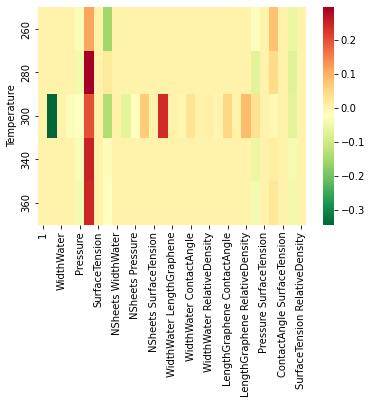

In [10]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
df_frame = pd.DataFrame()
for i in n:
    cData1=x1[x1['Temperature']==i]
    X = cData1.drop(['RelativeTBR','Temperature'], axis=1)
    y = cData1[['RelativeTBR']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    
    
    # created scaler
    scaler = StandardScaler()
    # fit scaler on training dataset
    scaler.fit(X_train)
    # transform training dataset
    X_train = scaler.transform(X_train)
    # transform test dataset
    X_test = scaler.transform(X_test)
    
    
    poly = PolynomialFeatures(degree=2, interaction_only=True)
    X_train2 = poly.fit_transform(X_train)
    X_test2 = poly.fit_transform(X_test)
    

    poly_clf = linear_model.Ridge()
    poly_clf.fit(X_train2, y_train)
    y_pred2 = poly_clf.predict(X_test2)
    print("TRAINING : DEGREE TWO _",i,"_",poly_clf.score(X_train2, y_train))
    print("TEST : DEGREE TWO _ ",i,"_", poly_clf.score(X_test2, y_test))

   

    features = pd.DataFrame(poly.transform(X_train), columns=poly.get_feature_names_out(X.columns))
   # print(i,"____\n",features,"\n---------------------")
    
    lreg_coefficient = pd.DataFrame()
    lreg_coefficient["Columns"] = features.columns
    lreg_coefficient['Coefficient Estimate'] = pd.Series(poly_clf.coef_.flatten())
    lreg_coefficient = lreg_coefficient.set_index('Columns').T
    lreg_coefficient["Temperature"] = i

    #print("Degree 2 Coefficients", lreg_coefficient)
    if (i==2):
        df_frame = lreg_coefficient.copy()
    else:
        df_frame = df_frame.append(lreg_coefficient)

    
df_frame = df_frame.rename_axis(None, axis="columns")
df_frame.reset_index(drop=True, inplace=True)
df_frame = df_frame.set_index('Temperature')
print(df_frame)
sns.heatmap(df_frame, cmap='RdYlGn_r')
plt.show()


    

    
        